***Vorlesung 'Syntax natürlicher Sprachen', WS 2020/21***

---
# Übung 5

In [1]:
from exercises_5 import *
from questions import aufgabe
import nltk
import sys

In [2]:
from nltk import DependencyGraph
from nltk.tree import Tree
from itertools import chain


### tree_labeled-Methode für DependencyGraphs (pretty_print-Dependenzbäume mit Labels):
def _tree_labeled(self, i):
        node = self.get_by_address(i)
        word = node["word"]
        rel = node["rel"]        
        deps = sorted(chain.from_iterable(node["deps"].values()))

        if deps:
            return Tree(word+'('+rel+')', [self._tree_labeled(dep) for dep in deps])
        else:
            return word+'('+rel+')'
        
def tree_labeled(self):
        node = self.root

        word = node["word"]
        rel = node["rel"]
        deps = sorted(chain.from_iterable(node["deps"].values()))
        return Tree(word+'('+rel+')', [self._tree_labeled(dep) for dep in deps])

    
DependencyGraph._tree_labeled = _tree_labeled
DependencyGraph.tree_labeled = tree_labeled

In [3]:
def transform_nr_conll(sent_nr):
    sent_list = []
    for line in list(filter(None, sent_nr.split("\n"))):
        line_list = line.split()
        line_list.pop(0)
        line_list.insert(1,"_")
        sent_list.append(" ".join([i for i in line_list[0:]]))

    return "\n".join([i for i in sent_list[0:]])

---
## Aufgabe 1: Dependenzgrammatik mit dem NLTK

#### Das NLTK lässt beim Schreiben von Dependenzgrammatiken lediglich die Beschreibung der Abhängigkeiten zwischen Wörtern zu. Dadurch werden Dependenzgrammatiken leicht redundant. Betrachten Sie das folgende Beispiel, das Ihnen vom letzten Übungsblatt bekannt vorkommen dürfte:

In [2]:
from nltk.parse import ProjectiveDependencyParser

grammar = nltk.DependencyGrammar.fromstring("""
'gibt' -> 'Mann' | 'Frau' | 'Buch'
'schenkt' -> 'Mann' | 'Frau' | 'Buch'
'Mann' -> 'der'
'Frau' -> 'der' | 'die'
'Buch' -> 'das'
""")

parser = ProjectiveDependencyParser(grammar)
sent = "der Mann gibt der Frau das Buch".split()
for tree in parser.parse(sent):
    tree.pretty_print(unicodelines=True)

     gibt     
 ┌────┼────┐   
Mann Frau Buch
 │    │    │   
der  der  das 



---
#### Erweitern Sie die Grammatik um die Verben aus Aufgabe 2 von Übungsblatt 4:
- *schläft*
- *gefällt*
- *kennt*

#### Verwenden Sie dazu die folgende Analyse-Funktion und sammeln Sie die Sätze, die als grammatisch erkannt werden sollten, in einer Liste.

In [3]:
def test_dep_grammar(grammar, sentences):
    depgr = nltk.DependencyGrammar.fromstring(grammar)
    parser = nltk.ProjectiveDependencyParser(depgr)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            tree.pretty_print(unicodelines=True)
            analyzed = True
        if not analyzed:
            print("Keine Analyse möglich", file=sys.stderr)

In [4]:
grammar1 = """
'gibt' -> 'Mann' | 'Frau' | 'Buch'
'schenkt' -> 'Mann' | 'Frau' | 'Buch'
'schläft' -> 'Mann' | 'Frau'
'gefällt' -> 'Mann' | 'Frau' | 'Buch'
'kennt' -> 'Mann' | 'Frau' | 'Buch'
'Mann' -> 'der'
'Frau' -> 'der' | 'die'
'Buch' -> 'das'
"""

In [5]:
test_sentences = [
    "der Mann gibt der Frau das Buch",
    "der Mann schläft",
    "das Buch gefällt der Frau",
    "die Frau kennt das Buch"    
]

In [6]:
test_dep_grammar(grammar1,test_sentences)

Satz 1: der Mann gibt der Frau das Buch
     gibt     
 ┌────┼────┐   
Mann Frau Buch
 │    │    │   
der  der  das 

Satz 2: der Mann schläft
schläft
   │    
  Mann 
   │    
  der  

Satz 3: das Buch gefällt der Frau
     gefällt     
 ┌──────┴─────┐   
Buch         Frau
 │            │   
das          der 

Satz 4: die Frau kennt das Buch
     kennt     
 ┌─────┴────┐   
Frau       Buch
 │          │   
die        das 



---
#### Erweitern Sie die Grammatik nun um die Adjektive aus Aufgabe 3 von Übungsblatt 4:
- *kluge*
- *schöne*
- *dicke*

In [7]:
grammar2 = """
'gibt' -> 'Mann' | 'Frau' | 'Buch'
'schenkt' -> 'Mann' | 'Frau' | 'Buch'
'schläft' -> 'Mann' | 'Frau' | 'Buch'
'gefällt' -> 'Mann' | 'Frau' | 'Buch'
'kennt' -> 'Mann' | 'Frau' | 'Buch'
'Mann' -> 'der'
'Frau' -> 'der' | 'die'
'Buch' -> 'das'

'Frau' -> 'schöne' | 'kluge' | 'dicke'
'Mann' -> 'schöne' | 'kluge' | 'dicke'
'Buch' -> 'schöne' | 'kluge' | 'dicke'
"""

In [8]:
test_sentences.extend([
    "die kluge schöne Frau kennt das Buch",
    "der schöne kluge Mann gibt der Frau das dicke Buch",
    "das dicke schöne kluge Buch schläft"
])

In [9]:
test_dep_grammar(grammar2,test_sentences)

Satz 1: der Mann gibt der Frau das Buch
     gibt     
 ┌────┼────┐   
Mann Frau Buch
 │    │    │   
der  der  das 

Satz 2: der Mann schläft
schläft
   │    
  Mann 
   │    
  der  

Satz 3: das Buch gefällt der Frau
     gefällt     
 ┌──────┴─────┐   
Buch         Frau
 │            │   
das          der 

Satz 4: die Frau kennt das Buch
     kennt     
 ┌─────┴────┐   
Frau       Buch
 │          │   
die        das 

Satz 5: die kluge schöne Frau kennt das Buch
          kennt            
      ┌─────┴───────────┐   
     Frau              Buch
 ┌────┼───────────┐     │   
die kluge       schöne das 

Satz 6: der schöne kluge Mann gibt der Frau das dicke Buch
            gibt                    
      ┌──────┴────┬────────┐         
     Mann        Frau     Buch      
 ┌────┼──────┐    │    ┌───┴─────┐   
der schöne kluge der  das      dicke

Satz 7: das dicke schöne kluge Buch schläft
    schläft             
       │                 
      Buch              
 ┌─────┼──────┬──

---
## Aufgabe 2: Ergänzungen vs. Angaben (1)

#### Betrachten Sie den folgenden Satz:
- Die neue Kollegin fährt mit der S-Bahn zu ihrem neuen Arbeitsplatz.

#### Diskutieren Sie, ob in diesem Satz alle vom Verb abhängigen Satzglieder Ergänzungen sind. Welche Tests können Sie anführen, um Ihren Standpunkt zu begründen?

#### Beantworten Sie zusätzlich die folgenden Fragen:

In [10]:
aufgabe(blatt5_2)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Mit welchen Tests kann die Funktion des obrig…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Bei welchen Sätzen wurden die Tests richtig a…

---
## Aufgabe 3: Manuelle Dependenzanalyse

#### Stellen Sie folgenden Satz im Dependenzmodell dar:
- Die neue Kollegin fährt mit der S-Bahn zu ihrem neuen Arbeitsplatz.

#### (a) Ergänzen Sie dafür zunächst den Konstituentenbaum mit Angabe der perkolierten (hochgereichten) Köpfe

(`head(S) = head(VP)`)

(verwendete Regeln für Baum:
`S=NP+VP`, `NP=DET+(ADJ)+N`, `PP=P+NP`, `VP=V+(PP)*`)

In [3]:
from nltk import Tree

In [19]:
#TEMPLATE:
np1 = Tree(
    'NP (Kollegin)',
    [Tree('DET', ['Die']), Tree('ADJ', ['neue']), Tree('N', ['Kollegin'])]
)
vp = Tree(
    'VP (fährt)',
    [
        Tree('V', ['fährt']),
        Tree('PP (mit)', [
            Tree('P', ['mit']),
            Tree('NP (S-Bahn)', [
                Tree('DET', ['der']),
                Tree('N', ['S-Bahn'])
            ])
        ]),
        Tree('PP (zu)', [
            Tree('P', ['zu']),
            Tree('NP (Arbeitsplatz)', [
                Tree('DET', ['ihrem']),
                Tree('ADJ', ['neuen']),
                Tree('N', ['Arb.'])
            ])
        ])
    ]
)
s = Tree(
    'S (fährt)',
    [np1, vp]
)

s.pretty_print(unicodelines=True)

                                     S (fährt)                                                                
          ┌──────────────────────────────┴─────────────────────┐                                               
          │                                                VP (fährt)                                         
          │                  ┌───────────┬─────────────────────┴───────────────────┐                           
          │                  │        PP (mit)                                  PP (zu)                       
          │                  │    ┌──────┴──────────┐                  ┌───────────┴────────────┐              
    NP (Kollegin)            │    │            NP (S-Bahn)             │                NP (Arbeitsplatz)     
 ┌────────┼──────────┐       │    │      ┌──────────┴──────────┐       │    ┌───────────────────┼──────────┐   
DET      ADJ         N       V    P     DET                    N       P   DET                 ADJ         N

#### (b) Fertigen Sie nun eine Tabelle an, in der Sie zu jedem Kopfwort seine Dependenten notieren. Für jede Gruppe unmittelbarer Konstituenten einer Phrase (Ko-Konstituenten) gilt dabei, dass die nicht-hochgereichten Köpfe die Dependenten des hochgereichten Kopfes sind (Nicht-Köpfe in der Phrase sind abhängig vom Kopf der Phrase).

#### Beantworten Sie anschließend folgende Fragen:

In [20]:
aufgabe(blatt5_3b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

#### (c) Konvertieren Sie Ihre Tabelle nun in einen Dependenzbaum (Stemma).

In [21]:
dep_tree = Tree(
    "fährt",
    [
        Tree("Kollegin", ["die", "neue"]),
        Tree("mit", [Tree("S-Bahn", ["der"])]),
        Tree("zu", [Tree("Arbeitsplatz", ["ihrem", "neuen"])])
    ]
)

dep_tree.pretty_print()

                  fährt                          
        ____________|_______________              
       |           mit              zu           
       |            |               |             
    Kollegin      S-Bahn       Arbeitsplatz      
  _____|______      |       ________|_________    
die          neue  der   ihrem              neuen



#### (d) Versehen Sie den Dependenzbaum mit den Labeln des Universal-Dependency-Tagsets: http://universaldependencies.org/u/dep/ (+ `prep` für Präposition als direkter Dependent zum Verb und `pcomp` als dessen Dependent)

#### Zeichnen Sie den entsprechenden Dependenzbaum (im MALT/CONLL-Format):

In [5]:
sent_nr = """
1 Die 3 det
2 neue 3 amod
3 Kollegin 4 nsubj
4 fährt 0 ROOT
5 mit 4 PREP 
6 der 7 det
7 S-Bahn 5 PCOMP
8 zu 4 PREP
9 ihrem 11 det
10 neuen 11 amod
11 Arbeitsplatz 8 PCOMP
"""

sent = transform_nr_conll(sent_nr)
dg = DependencyGraph(sent)
tree_labeled = dg.tree_labeled()
tree_labeled.pretty_print(unicodelines=True)   

                                     fährt(ROOT)                                      
                ┌─────────────────────────┼────────────────────────┐                   
                │                     mit(PREP)                 zu(PREP)              
                │                         │                        │                   
         Kollegin(nsubj)            S-Bahn(PCOMP)            Arbeitsplatz(            
                │                         │                      PCOMP)               
   ┌────────────┴────────────┐            │           ┌────────────┴────────────┐      
Die(det)                 neue(amod)    der(det)   ihrem(det)               neuen(amod)





#### Kontrollieren Sie sich dann selbst mit den folgenden Fragen:

In [22]:
aufgabe(blatt5_3d)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> K…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> K…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> K…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> f…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> f…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> f…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> m…

#### (e) Fertigen Sie einen weiteren Dependenzgraphen für die alternative Analse der Präposition als Kasus-Marker (`case`) an.

In [23]:
dep_tree_alt = Tree(
     "fährt",
    [
        Tree("Kollegin", ["die", "neue"]),
        Tree("S-Bahn", ["mit", "der"]),
        Tree("Arbeitsplatz", ["zu", "ihrem", "neuen"])
    ]
)

dep_tree_alt.pretty_print()

                             fährt                       
        _______________________|____________              
    Kollegin          S-Bahn           Arbeitsplatz      
  _____|______      ____|______      _______|_________    
die          neue mit         der   zu    ihrem     neuen



#### Zeichnen Sie den entsprechenden Dependenzbaum (im MALT/CONLL-Format):

In [6]:
sent_nr = """
1 Die 3 det
2 neue 3 amod
3 Kollegin 4 nsubj
4 fährt 0 ROOT
5 mit 7 CASE 
6 der 7 det
7 S-Bahn 4 NMOD/OBL
8 zu 11 CASE
9 ihrem 11 det
10 neuen 11 amod
11 Arbeitsplatz 4 NMOD/OBL
"""

sent = transform_nr_conll(sent_nr)
dg = DependencyGraph(sent)
tree_labeled = dg.tree_labeled()
tree_labeled.pretty_print(unicodelines=True)   

                                                               fährt(ROOT)                                   
                ┌────────────────────────────────────┬──────────────┴─────────────────────┐                   
         Kollegin(nsubj)                      S-Bahn(NMOD/OBL)                      Arbeitsplatz(            
                │                                    │                                NMOD/OBL)              
   ┌────────────┴────────────┐          ┌────────────┴──────────────┐         ┌───────────┼────────────┐      
Die(det)                 neue(amod) mit(CASE)                    der(det)  zu(CASE)   ihrem(det)  neuen(amod)



#### Beantworten Sie anschließend folgende Fragen zur Kantenbeschriftung:

In [24]:
aufgabe(blatt5_3e)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

#### (f) Welche Konstituenten lassen sich anhand der Struktur des Dependenzbaumes identifizieren?

In [25]:
aufgabe(blatt5_3f)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Konstituenten lassen sich am Dependenz…

---
## Aufgabe 4: Attributtypen

#### Analysieren Sie die folgende komplexe NP. Welche Attributtypen treten auf?
- Die lang ersehnte Fahrt der Klasse 5b nach Paris, die sich aus irgendeinem Grunde immer wieder verzögert hatte, findet nun endlich statt.

In [26]:
aufgabe(blatt5_4)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

---
## Aufgabe 5: Phrasenkategorien

#### Erläutern Sie an folgendem Beispielsatz den Unterschied zwischen Adverb und Adverbial.
- Paul schwimmt sehr gut.

#### Beantworten Sie zusätzlich folgende Fragen:

In [27]:
aufgabe(blatt5_5)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

---
## Aufgabe 6: Subjektidentifikation

#### Inwiefern bereitet die NP *ein Fehler* im folgenden Satz Schwierigkeiten für die Anwendung der gängigen Identifikationskriterien von Subjekten?
- Dem Lehrer ist schon wieder ein Fehler unterlaufen.

#### Beantworten Sie außerdem die folgenden Fragen.

In [28]:
aufgabe(blatt5_6)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was sind Identifikationskriterien für das Sub…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was gilt <b>nicht</b> für die NP <i> ein Fehl…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was spricht dafür, dass es sich bei <i> ein F…

---
## Aufgabe 7: Direkte und indirekte Objekte

---
### Aufgabe 7 a:
#### Handelt es sich bei der Genitiv-NP in folgendem Satz um ein direktes Objekt?
#### Bitte begründen!
- Ich freue mich darüber, dass man ihn endlich des Diebstahls überführt hat.

#### Beantworten Sie im Zuge dessen auch die folgenden Fragen.

In [29]:
aufgabe(blatt5_7a)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Gründe sprechen für eine Klassifizieru…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche im Deutschen für das Objekt typische K…

---
### Aufgabe 7b:

#### Vergleichen Sie den deutschen Satz (1.) mit dem englischen Äquivalent. Wie wird das indirekte Objekt im Englischen, wie wird es im Deutschen kodiert?
1. Ich gebe dem Jungen das Buch.
2. I give the book to the boy.

#### Beantworten Sie die folgenden zwei Fragen.

In [30]:
aufgabe(blatt5_7b)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Im Englischen wird das indirekte Objekt _______…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Im Deutschen wird das indirekte Objekt ________…

---
## Aufgabe 8: Ergänzungen vs. Angaben (2)

#### Diskutieren Sie die Problematik der Unterscheidung von Ergänzungen und Angaben mit Bezug auf die folgenden Sätze:
1. *Peter steigt auf das Pferd.*
2. *Peter besteigt das Pferd.*
3. *Peter reitet das Pferd.*

#### Bearbeiten Sie auch die nachfolgenden Aufgaben.

#### Welche Ergebnisse liefern die Tests zur Komplement/Adjunkt-Differenzierung?

In [31]:
aufgabe(blatt5_8a)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Schlägt der Adverbialsatz-Test fehl, so handelt…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Schlägt der geschehen-Test fehl, so handelt es …

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Tests ergeben, dass es sich bei <i> au…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Tests ergeben, dass es sich bei <i> da…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Tests ergeben, dass es sich bei <i> da…

#### Beantworten Sie auch die folgenden Fragen:

In [33]:
aufgabe(blatt5_8b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Unter der Annahmen, dass alle präpositional a…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Unter der Annahmen, dass alle Adverbiale Anga…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie könnte man abschließend das in Frage stehen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie könnte man abschließend das in Frage stehen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie könnte man abschließend das in Frage stehen…

---
# Hausaufgaben 

---
## Aufgabe 9: Manuelle Dependenzanalyse

#### Stellen Sie folgenden Satz im Dependenzmodell dar:
- Ich kenne einen älteren Bruder von zwei sehr lebhaften Mädchen.

#### (a) Erstellen Sie dafür zunächst einen Konstituentenbaum mit Angabe der perkolierten (hochgereichten) Köpfe
(`head(S) = head(VP)`)

(Regeln für Baum:
`S=NP+VP`, `NP=DET+(ADJP)+N+(PP)` oder `NP=PRON` oder `NP=NUM+(ADJP)+N`, `PP=P+NP`, `ADJP=(ADV)+ADJ`, `VP=V+NP`)

Bestimmen Sie die Köpfe dieses Mal sofort gemäß der Primacy of Content Words (http://universaldependencies.org/u/overview/syntax.html); vgl. Aufgabe 3 (e)

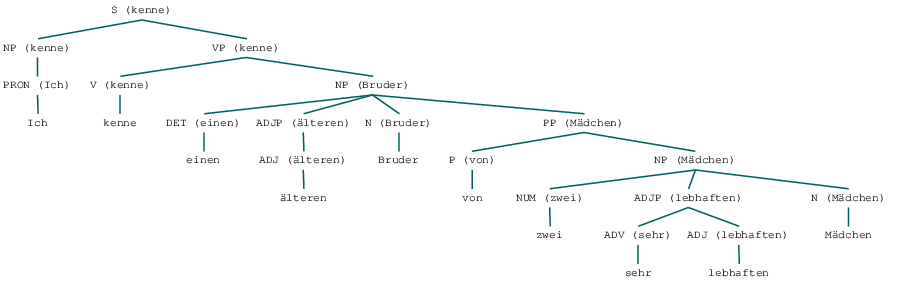

In [5]:
from IPython.display import display

np1 = Tree(
    'NP (kenne)',
    [Tree('PRON (Ich)', ['Ich'])]
)
adjp2 = Tree (
 'ADJP (lebhaften)',
    [Tree('ADV (sehr)', ['sehr']), Tree('ADJ (lebhaften)', ['lebhaften'])]
)
np3 = Tree(
'NP (Mädchen)',
    [Tree('NUM (zwei)', ['zwei'] ), adjp2, Tree('N (Mädchen)',['Mädchen'] )]
)
pp = Tree(
    'PP (Mädchen)',
    [Tree ('P (von)', ['von']), np3]
)
adjp1 = Tree(
    'ADJP (älteren)',
    [Tree('ADJ (älteren)', ['älteren'])]
)
np2 = Tree(
    'NP (Bruder)',
    [ Tree ('DET (einen)', ['einen']), adjp1, Tree ('N (Bruder)', ['Bruder']), pp]
)
vp = Tree(
    'VP (kenne)',
    [Tree('V (kenne)', ['kenne']), np2]
)
s = Tree(
    'S (kenne)',
    [np1, vp]
)

display(s)

#### (b) Fertigen Sie nun eine Tabelle an, in der Sie zu jedem Kopfwort seine Dependenten notieren. Für jede Gruppe unmittelbarer Konstituenten einer Phrase (Ko-Konstituenten) gilt dabei, dass die nicht-hochgereichten Köpfe die Dependenten des hochgereichten Kopfes sind (Nicht-Köpfe in der Phrase sind abhängig vom Kopf der Phrase).

#### Beantworten Sie anschließend folgende Fragen:

In [6]:
aufgabe(blatt5_9b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

#### (c) Konvertieren Sie Ihre Tabelle nun in einen Dependenzbaum (Stemma).

In [7]:
dep_tree = Tree(
    "kenne",
    ["Ich", Tree("Bruder", 
                 ["einen", "älteren", Tree("Mädchen", 
                                          ["von", "zwei", Tree("lebhaften",
                                                              ["sehr"])
                                          ]) 
                 ])
    ]
)

dep_tree.pretty_print()

           kenne                          
  ___________|______                       
 |                Bruder                  
 |     _____________|_______               
 |    |      |           Mädchen          
 |    |      |       _______|________      
 |    |      |      |       |    lebhaften
 |    |      |      |       |        |     
Ich einen älteren  von     zwei     sehr  



#### (d) Versehen Sie den Dependenzbaum mit den Labeln des Universal-Dependency-Tagsets: http://universaldependencies.org/u/dep/

#### Zeichnen Sie den entsprechenden Dependenzbaum (im MALT/CONLL-Format):

In [7]:
sent_nr = """
1 Ich 2 nsubj 
2 kenne 0 ROOT
3 einen 5 det
4 älteren 5 amod 
5 Bruder 2 obj
6 von 10 case
7 zwei 10 nummod
8 sehr 9 advmod
9 lebhaften 10 amod  
10 Mädchen 5 nmod
"""

sent = transform_nr_conll(sent_nr)
dg = DependencyGraph(sent)
tree_labeled = dg.tree_labeled()
tree_labeled.pretty_print(unicodelines=True)   

                       kenne(ROOT)                                           
    ┌───────────────────────┴────────────┐                                    
    │                               Bruder(obj)                              
    │          ┌────────────┬────────────┴────────────┐                       
    │          │            │                   Mädchen(nmod)                
    │          │            │            ┌────────────┼──────────────┐        
    │          │            │            │            │       lebhaften(amod)
    │          │            │            │            │              │        
Ich(nsubj) einen(det) älteren(amod)  von(case)   zwei(nummod)   sehr(advmod) 





#### Kontrollieren Sie sich dann selbst mit den folgenden Fragen:

In [8]:
aufgabe(blatt5_9d)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> k…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> l…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> z…

---
## Aufgabe 10: Phrasenkategorien

#### Bestimmen Sie in folgendem Satz, ob es sich bei der Präpositionalphrase um ein präpositionales Objekt oder um ein Adverbial handelt. Begründen Sie Ihre Entscheidung.
- Peter verlässt sich immer gerne auf andere.

In [9]:
aufgabe(blatt5_10)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Handelt es sich im Satz bei der Präpositionalph…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wieso?</h4>'), HTML(value='<i>Markieren Sie <…

--- 
## Aufgabe 11: Valenz und Dependenz

#### Zeigen Sie an folgendem Satz den Unterschied zwischen Valenz und Dependenz auf:
- Peter schläft gerne im Zelt.

In [10]:
aufgabe(blatt5_11)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

--- 
## Aufgabe 12 - Praktische Aufgabe: Dependenzparsing

#### Parsen Sie den Satz *Joe put the fish on the log* über die Webanwendung des Stanford-Parsers: http://nlp.stanford.edu:8080/parser/index.jsp. Machen Sie sich mit der Darstellung der Dependenzrelationen (Ergebnis unter ’Universal Dependencies’) vertraut und vergleichen Sie die Darstellung mit der Visualisierung, die Sie sich auf http://nlp.stanford.edu:8080/corenlp/process anzeigen lassen können (unter ’Basic Dependencies’).

---
## Aufgabe 13: Fragen zu NLTK-Kapitel 8.5

#### Lesen Sie das NLTK-Teilkapitel 8.5 (’Dependencies and Dependency Grammar’): http://www.nltk.org/book/ch08.html.

#### Beantworten Sie insbesondere folgende Fragen:

---
### Aufgabe 13 a:

#### Welche Kriterien für die Entscheidung, was in einer Konstruktion (C) Head (H) und was Dependent (D) ist, werden genannt?

In [11]:
aufgabe(blatt5_13a)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Kriterien stimmen?</h4>'), HTML(value=…

---
### Aufgabe 13 b:

#### Welche Lösung wird in 8.5.1 (’Valency and the Lexicon’) für die Behandlung von Verben mit unterschiedlicher Valenz in einer CFG vorgeschlagen?

In [12]:
aufgabe(blatt5_13b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich die Einführung von einem Nicht…